# 단축키 설명

* 실행 : SHIFT + ENTTER
* In [ ] 선택 후 m : 메모장으로 동작
* In [ ] 선택 후 y : 코드작성기으로 동작
* In [ ] 선택 후 dd : 삭제
* In [ ] 선택 후 a : 윗 라인 생성
* In [ ] 선택 후 b : 아래 라인 생성

In [ ]:
# 새로운 웹 페이지 창 띄우기 위한 도구 (requests)
!pip install requests

In [ ]:
# HTML 분석 도구 (beautifulsoup4)
!pip install beautifulsoup4

In [ ]:
# 데이터 분석 도구 (pandas)
!pip install pandas

In [ ]:
# 크롬 창을 띄우기 위한 도구 (selenium)
!pip install selenium

크롭 웹드라이버 다운로드

https://chromedriver.storage.googleapis.com/index.html?

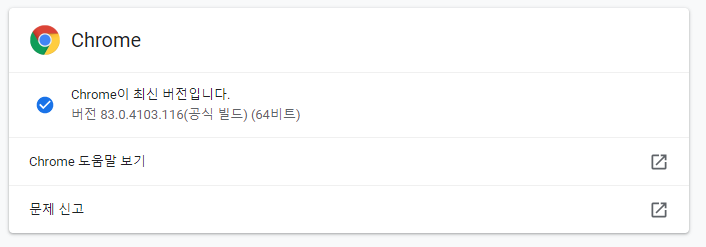

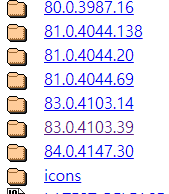

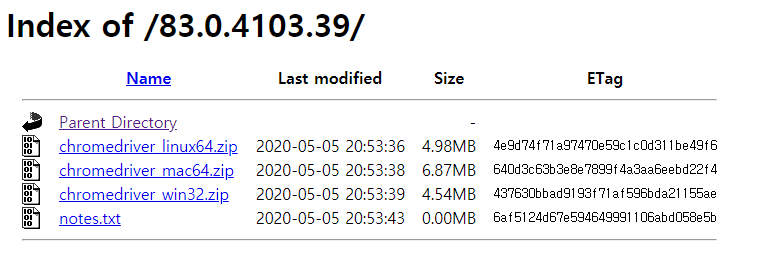

In [ ]:
# 이미지 편집 도구 (pillow)
!pip install pillow

In [ ]:
# 영상 편집 도구 (opencv-python)
!pip install opencv-python

a = 1; b = 2

a, b = b, a

파이썬 = 자동화 프로그램

# 네이버 크롤링(스크래이핑)

# HTTP 요청

| 메서드 | 설명 |
|-|-|
| GET | 사용자가 정보를 요청 |
| POST | 사용자가 새로운 정보를 요청 |
| PUT | 사용자가 수정할 정보를 요청 |
| DELETE | 사용자가 삭제할 정보를 요청 |



# HTTP 응답

| 응답코드 | 설명 |
|-|-|
| 1XX | 사용자가 요청한 정보를 처리중임을 알림 |
| 2XX | 사용자가 요청한 정보를 정상적으로 처리하였음을 알림 |
| 3XX | 사용자가 요청한 정보를 새로운 페이지로 이동할 경우 알림 |
| 4XX | 사용자가 요청한 정보가 잘못되었음을 알림 (주로 오타) |
| 5XX | 서버에 오류가 발생하였음을 알림 |

In [ ]:
# 네이버 홈페이지에 접속

from selenium import webdriver
from PIL import Image

driver = webdriver.Chrome('chromedriver.exe')
driver.get('https://www.naver.com')

# driver.save_screenshot('naver1.png')

In [ ]:
Image.open('naver1.jpg')

웹 구조

* 1) 태그 - HTML
* 2) CSS -> 태그에 색을 입힌다.
* 3) 자바스크립트

In [ ]:
# 네이버 첫화면의 로그인창을 클릭한다.

xpath = '''//*[@id="account"]/a'''
driver.find_element_by_xpath(xpath).click()

In [ ]:
driver.close()

In [ ]:
%pwd

# 우리동네의 최저가 주유소 검색하기

# 오피넷 : http://www.opinet.co.kr

In [ ]:
from selenium import webdriver

driver = webdriver.Chrome('chromedriver.exe')
driver.get('http://www.opinet.co.kr/searRgSelect.do')

1번

<싼 주유소 찾기> -> <지역별> 항목을 수동으로 클릭해준다.

2번 

<지역> -> <서울>을 확인한다.

### F12 -> 알고 싶은 항목을 요소검사로 클릭

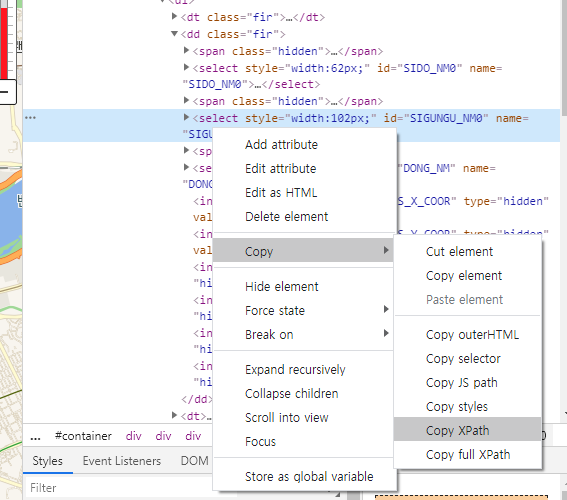

In [ ]:
# 관할 구 리스트가 들어간 박스의 xpath 값을 찾는다. xpath 값을 넣을때는 ('''''') 작은따옴표 3개 사이에 입력

gu_list_raw = driver.find_element_by_xpath('''//*[@id="SIGUNGU_NM0"]''')

In [ ]:
# 관할 구 리스트를 박스에서 찾는다

gu_list = gu_list_raw.find_elements_by_tag_name('option')

In [ ]:
gu_names = [option.get_attribute('value') for option in gu_list]

gu_names.remove('')

gu_names

In [ ]:
# 구별 조회가 잘 되는지 테스트한다.

element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[10])

In [ ]:
# 조회 버튼 (xpath이용)

xpath = '''//*[@id="searRgSelect"]/span'''

element_seoul_gu = driver.find_element_by_xpath(xpath).click()

In [ ]:
# 엑셀저장 (xpath이용)

xpath = '''//*[@id="glopopd_excel"]/span'''

element_get_excel = driver.find_element_by_xpath(xpath).click()

In [ ]:
# 진행상황을 알려주는 모듈

!pip install tqdm

In [ ]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    
    # 관할구 이름 조회
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(2) # 클릭간에 시간을 주기

    # 조회버튼
    xpath = '''//*[@id="searRgSelect"]/span'''
    element_seoul_gu = driver.find_element_by_xpath(xpath).click()
    time.sleep(2)

    # 엑셀저장버튼
    xpath = '''//*[@id="glopopd_excel"]/span'''
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    time.sleep(2)

In [ ]:
# 홈페이지를 닫는다.
driver.close()